# Question 1

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data = np.array([
    [1, 1],
    [2, 4],
    [3.2, 6],
    [4, 3],
    [5, 2],
    [6, 2],
])
x, y = data.T

In [3]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [4]:
x_train = x.reshape(-1, 1)
y_train = y.reshape(-1, 1)

In [5]:
test = np.linspace(0,7,50)[:, np.newaxis]

In [6]:
K = [1,2,3,6]

#### Check RMSE to compare different K value

In [7]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = []
pred2 = []
for k in K:
    model2 = neighbors.KNeighborsRegressor(n_neighbors = k)
    model2.fit(x_train, y_train)
    prediction2 = model2.predict(x_train)
    pred2.append(prediction2)
    error = sqrt(mean_squared_error(y_train,prediction2))
    rmse_val.append(error)
    print("RMSE for K=",k, "is", error,"\n")

RMSE for K= 1 is 0.0 

RMSE for K= 2 is 1.241638702145945 

RMSE for K= 3 is 1.3333333333333333 

RMSE for K= 6 is 1.632993161855452 



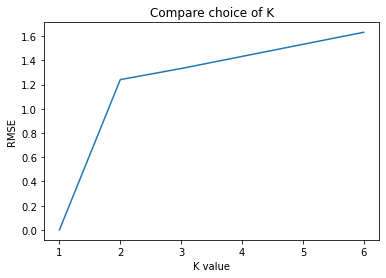

In [8]:
plt.plot(K,rmse_val)
plt.title("Compare choice of K")
plt.xlabel("K value")
plt.ylabel("RMSE")
plt.show()

**k=2** should be the best k because it has relatively low RMSE as we can see directly from above plot. k=1 has overfitting problem. k=3 or 6 have higher RMSE than k=2. 

In [9]:
test_hw2 =  np.array([
    [1.25, 2],
    [3.4, 5],
    [4.25, 2.5]
])
x2, y2 = test_hw2.T

In [10]:
x2_test = x2.reshape(-1, 1)
y2_test = y2.reshape(-1, 1)

In [11]:
rmse_val2 = []
pred22 = []
for k in K:
    model2 = neighbors.KNeighborsRegressor(n_neighbors = k)
    model2.fit(x_train, y_train)
    prediction22 = model2.predict(x2_test)
    pred22.append(prediction22)
    error2 = sqrt(mean_squared_error(y2_test,prediction22))
    rmse_val2.append(error2)
    print("RMSE for K=",k, "is", error2,"\n")

RMSE for K= 1 is 0.8660254037844386 

RMSE for K= 2 is 0.408248290463863 

RMSE for K= 3 is 1.2360330811826103 

RMSE for K= 6 is 1.3228756555322954 



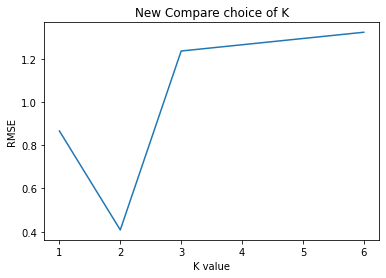

In [12]:
plt.plot(K,rmse_val2)
plt.title("New Compare choice of K")
plt.xlabel("K value")
plt.ylabel("RMSE")
plt.show()

**k=2** still is the best K value because it has lowest RMSE and relatively simple model. 

# Question 2

## (a):

Conditions for the derivative of the MSE that is necessary for β0, β1 to be optimal: 

Use Method of Least Squares to find minimum: $(\hat{\beta_0}, \hat{\beta_1})=\arg \max_{\beta_0,\beta_1} \sum_{i=1}^{n} (y_i-\beta_0-\beta_1*x_i)^2$

$$ Q = \sum_{i=1}^{n} (y_i-\beta_0-\beta_1*x_i)^2 $$

Take derivative respect to $\beta_0$ and $\beta_1$ set them equal to zero and solve:

$$\frac{\partial Q}{\partial \beta_0} = -2\sum_{i=1}^{n} (y_i-\beta_0-\beta_1*x_i) = 0$$
$$\frac{\partial Q}{\partial \beta_1} = -2\sum_{i=1}^{n} (y_i-\beta_0-\beta_1*x_i) = 0$$

Rearrange the previous two equations so that:

$$n\beta_0+\beta_1 \sum_{i=1}^{n} x_i = \sum_{i=1}^{n} y_i$$ (1)
$$\beta_0\sum_{i=1}^{n} x_i + \beta_1\sum_{i=1}^{n} x_i^2  = \sum_{i=1}^{n} x_i*y_i$$ (2)

Now, dividing (1) by n and solve for $\hat\beta_0$ to get $\hat\beta_0 = \frac{\sum_{i=1}^{n} y_i}{n}-\hat\beta_1\frac{\sum_{i=1}^{n}x_i}{n}=\bar{y} -\hat\beta_1\bar{x}$

Finally, substitute $\hat\beta_0$ in (2) to get:

$$\hat{\beta_1}=\frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i-\bar{x})^2} $$

Therefore, formula of $\hat\beta_0$ and $\hat\beta_1$ are:

$$\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$$

$$\hat{\beta_1}=\frac{\sum_{i=1}^{n} (x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{n} (x_i-\bar{x})^2} $$

## (b):

In [13]:
data2b = np.array([
    [1, 1],
    [2, 2],
    [3, 3],
    [4, 3.5]
])
x2b, y2b = data2b.T
x2b_train = x2b.reshape(-1, 1)
y2b_train = y2b.reshape(-1, 1)

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x2b_train, y2b_train)
print("R2 is:", reg.score(x2b_train, y2b_train),
      "\nRegression Coefficient is: ", reg.coef_,
      "\nRegression Intercept is: ", reg.intercept_)

R2 is: 0.9796610169491525 
Regression Coefficient is:  [[0.85]] 
Regression Intercept is:  [0.25]


$$y_i=0.25+0.85*x_i$$

meaning of $\beta_1$: **as x increase 1 unit, the average difference in y increase 0.85 unit**

# Question 3

## (a)
One Hot Encoding:

What: create additional single dummy variables to represent more than two level qualitative predictors

If the categorical predictors only have two values, then convert to X=1 or 0; 

If the categorical predictors have more than two values, then transform into vector of appropriate dimension: 
    Asian -> [1 0 0]^T

When: When there is more than **two** level of **qualitative** predictors.

## (b)

(i) zipcode:
No, because there are too many levels in zipcode. When there are too many levels, then the matrix will be very large which will result expensive computing. 

(ii) price:
No, because price is our interested response value. If it convert to 0 or 1, then following data science steps will be no meaning. 

(iii) city:
Yes, city is better than zipcode because there are not too many levels and it's a influence predictor for housing price.

(iv) name:
No, because it's not related to our response value a lot. Also, we could use count for number of house homeowner have instead of encoding.

(v) year:
Yes, because year has fit levels to be encoded. Year is also related to housing price a lot.


# Question 4

## (a)

overfitted

## (b)

good fit

## (c)

underfitted

# Question 5

## (a)

False: 

We can solve the problem of linear regression by using **optimization algorithms such as gradient descent to iteratively adjust the model parameters** and minimize the MSE. Otherwise, it will be very expensive to compute. 

## (b)

False: 

We can detect that a model is overfitting when the model performs **significantly better** on the training data than on the testing data, but it is not necessarily true that the training error is larger than the testing error.

## (c)

True: 

For regression problems, R2 is a measure of how much of the variability in the data is explained by the model. R2 takes values **between 0 and 1**, where 0 indicates that the model explains none of the variability in the data, and 1 indicates that the model explains all of the variability in the data. Since the explained variance can never be greater than the total variance, R2 can never be greater than 1.

## (d)

False: 

Multilinear regression and polynomial regression are two distinct regression techniques. *Polynomial regression is a special case of linear regression because we treat each $x^m$ as a separate predictors.*


## (e)

False: 

KNN is more likely to overfit the data as K gets **smaller**. As K gets larger, the model becomes less sensitive to the local structure of the data and more generalizable. If K is too small, the model may become too sensitive to the noise or outliers in the data, resulting in overfitting. In such cases, increasing K can help to smooth out the decision boundaries and reduce the effects of noise or outliers.
